In [1]:
import pandas as pd
import requests
import datetime as dt

In [2]:
import warnings 
pd.options.mode.chained_assignment = None # se desactiva advertencias de pandas por la edición_sobrescritura

In [110]:
# API

url = "https://data.cityofnewyork.us/resource/c3uy-2p5r.json"

# Parámetros de paginación
limit = 1000  # Número máximo de resultados por página
offset = 0    # Número de resultados a omitir antes de comenzar a obtener resultados
results = []  # Lista para almacenar los resultados

while True:
    # Construir la URL con los parámetros de paginación
    query_url = f'{url}?$limit={limit}&$offset={offset}'
    
    # Leer los datos de la URL en un DataFrame
    df = pd.read_json(query_url)
    
    # Agregar los resultados al DataFrame
    results.append(df)
    
    # Verificar si hay más resultados
    if len(df) < limit:
        break  # Si no hay más resultados, salir del ciclo
    
    offset += limit  # Incrementar el offset para la próxima página

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(results, ignore_index=True)

In [111]:
df_final

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,2013-06-01T00:00:00.000,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,2014-06-01T00:00:00.000,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,2013-06-01T00:00:00.000,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,2014-06-01T00:00:00.000,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,2008-12-01T00:00:00.000,5.89
...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,2020-06-01T00:00:00.000,28.70
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,2020-06-01T00:00:00.000,29.56
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,2020-06-01T00:00:00.000,29.65
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,2020-06-01T00:00:00.000,29.28


In [113]:
df=df_final

El dataset presenta diferentes clasificaciones en La columna 'geo_type_name' la cual determina las áreas de la ciudad. Para el análisis del EDA se usa **CD**. Equivalente a community districts.

In [114]:
# Se modifica la fecha en 'start_date'

df['start_date'] = pd.to_datetime(df['start_date'])

# Se eliminan columnas 
df = df.drop(['unique_id', 'indicator_id'], axis=1)

print(f"Se selecciona CD con 5900 datos \n{df['geo_type_name'].value_counts()}")

df=df[df['geo_type_name'] == 'CD']

df=df.reset_index(drop=True) #reset de indice

df.head(3)


Se selecciona CD con 5900 datos 
UHF42       6216
CD          5900
UHF34       3128
Borough      730
Citywide     148
Name: geo_type_name, dtype: int64


,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,2013-06-01,34.64
1,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,2014-06-01,33.22
2,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,2008-12-01,5.89


In [115]:
df.dtypes

name                      object
measure                   object
measure_info              object
geo_type_name             object
geo_join_id                int64
geo_place_name            object
time_period               object
start_date        datetime64[ns]
data_value               float64
dtype: object

Se observa que el dataset cuenta con la densidad de trafico por año. 

In [116]:
df['name'].value_counts()

Nitrogen Dioxide (NO2)                                            2124
Fine Particulate Matter (PM2.5)                                   2124
Ozone (O3)                                                         708
Sulfur Dioxide (SO2)                                               472
Traffic Density- Annual Vehicle Miles Traveled                     118
Traffic Density- Annual Vehicle Miles Traveled for Trucks          118
Traffic Density- Annual Vehicle Miles Traveled for Cars            118
Air Toxics Concentrations- Average Formaldehyde Concentrations      59
Air Toxics Concentrations- Average Benzene Concentrations           59
Name: name, dtype: int64

In [117]:
# Se renombran categorias 

# Avg Benzene 
df['name'] = df['name'].apply(lambda x: "Avg Benzene" if 'Average Benzene Concentrations' in x else  x)

# Avg Formaldehyde 
df['name'] = df['name'].apply(lambda x: "Avg Formaldehyde" if 'Formaldehyde Concentrations' in x else  x)

df['name'].value_counts()

Nitrogen Dioxide (NO2)                                       2124
Fine Particulate Matter (PM2.5)                              2124
Ozone (O3)                                                    708
Sulfur Dioxide (SO2)                                          472
Traffic Density- Annual Vehicle Miles Traveled                118
Traffic Density- Annual Vehicle Miles Traveled for Trucks     118
Traffic Density- Annual Vehicle Miles Traveled for Cars       118
Avg Formaldehyde                                               59
Avg Benzene                                                    59
Name: name, dtype: int64

In [118]:
# Community Districts New york

brooklyn = ["South Crown Heights and Lefferts Gardens (CD9)","Sunset Park (CD7)","Sheepshead Bay (CD15)",
"Park Slope and Carroll Gardens (CD6)", "Greenpoint and Williamsburg (CD1)", "Fort Greene and Brooklyn Heights (CD2)",
"Flatlands and Canarsie (CD18)","Flatbush and Midwood (CD14)","East New York and Starrett City (CD5)","East Flatbush (CD17)",
"Crown Heights and Prospect Heights (CD8)", "Coney Island (CD13)","Bushwick (CD4)","Brownsville (CD16)",
"Borough Park (CD12)","Bensonhurst (CD11)","Bedford Stuyvesant (CD3)", "Bay Ridge and Dyker Heights (CD10)"]

manhattan = ["Financial District (CD1)", "Greenwich Village and Soho (CD2)","Lower East Side and Chinatown (CD3)",
    "Clinton and Chelsea (CD4)","Midtown (CD5)","Stuyvesant Town and Turtle Bay (CD6)","Upper West Side (CD7)",
    "Upper East Side (CD8)","Morningside Heights and Hamilton Heights (CD9)","Central Harlem (CD10)","East Harlem (CD11)",
    "Washington Heights and Inwood (CD12)"]

queens = ["Long Island City and Astoria (CD1)","Woodside and Sunnyside (CD2)","Elmhurst and Corona (CD4)",
    "Ridgewood and Maspeth (CD5)","Rego Park and Forest Hills (CD6)","Flushing and Whitestone (CD7)",
    "Hillcrest and Fresh Meadows (CD8)","Kew Gardens and Woodhaven (CD9)","South Ozone Park and Howard Beach (CD10)",
    "Bayside and Little Neck (CD11)","Jamaica and Hollis (CD12)","Queens Village (CD13)", "Rockaway and Broad Channel (CD14)",
    "Jackson Heights (CD3)"]

state_island = ["St. George and Stapleton (CD1)","Tottenville and Great Kills (CD3)","South Beach and Willowbrook (CD2)"]

the_bronx = ["Morrisania and Crotona (CD3)", "Highbridge and Concourse (CD4)", "Hunts Point and Longwood (CD2)",
              "Morris Park and Bronxdale (CD11)", "Parkchester and Soundview (CD9)","Williamsbridge and Baychester (CD12)",
              "Belmont and East Tremont (CD6)", "Kingsbridge Heights and Bedford (CD7)", "Riverdale and Fieldston (CD8)",
              "Throgs Neck and Co-op City (CD10)","Mott Haven and Melrose (CD1)", "Fordham and University Heights (CD5)"]


In [119]:
# Se crea la nueva columna y se asigna el valor correspondiente a cada borough

df['borough'] = df['geo_place_name'].apply(lambda x:'brooklyn' if x in brooklyn else 
                                                          ('manhattan' if x in manhattan else 
                                                          ('queens' if x in queens else 
                                                          ('state_island' if x in state_island else 
                                                          ('the_bronx' if  x in the_bronx else None)))))


In [120]:
df.sample(3)

,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,borough
3967,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,403,Jackson Heights (CD3),Winter 2015-16,2015-12-01,7.67,queens
733,Nitrogen Dioxide (NO2),Mean,ppb,CD,212,Williamsbridge and Baychester (CD12),Winter 2012-13,2012-12-01,21.97,the_bronx
2219,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,311,Bensonhurst (CD11),Annual Average 2013,2012-12-01,8.23,brooklyn


## Dataset 1. Concentraciòn del tràfico

In [121]:
# Saco un dataset del trafico

trafic_1=df[df['name'] == 'Traffic Density- Annual Vehicle Miles Traveled for Cars']
trafic_2=df[df['name'] == 'Traffic Density- Annual Vehicle Miles Traveled']
trafic=pd.concat([trafic_1, trafic_2], axis=0, ignore_index=True)
trafic

,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,borough
0,Traffic Density- Annual Vehicle Miles Traveled...,million miles,per km2,CD,101,Financial District (CD1),2005,2005-01-01,38.8,manhattan
1,Traffic Density- Annual Vehicle Miles Traveled...,million miles,per km2,CD,102,Greenwich Village and Soho (CD2),2005,2005-01-01,41.7,manhattan
2,Traffic Density- Annual Vehicle Miles Traveled...,million miles,per km2,CD,103,Lower East Side and Chinatown (CD3),2005,2005-01-01,57.7,manhattan
3,Traffic Density- Annual Vehicle Miles Traveled...,million miles,per km2,CD,104,Clinton and Chelsea (CD4),2005,2005-01-01,43.8,manhattan
4,Traffic Density- Annual Vehicle Miles Traveled...,million miles,per km2,CD,105,Midtown (CD5),2005,2005-01-01,47.3,manhattan
...,...,...,...,...,...,...,...,...,...,...
231,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,CD,413,Queens Village (CD13),2016,2016-01-01,30.8,queens
232,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,CD,414,Rockaway and Broad Channel (CD14),2016,2016-01-01,6.9,queens
233,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,CD,501,St. George and Stapleton (CD1),2016,2016-01-01,11.3,state_island
234,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,CD,502,South Beach and Willowbrook (CD2),2016,2016-01-01,11.8,state_island


In [47]:
trafic['name'].value_counts()

Traffic Density- Annual Vehicle Miles Traveled for Cars    118
Traffic Density- Annual Vehicle Miles Traveled             118
Name: name, dtype: int64

In [122]:
# Se renombra categorias 

trafic['name'] = "Traffic Density" 

# Se elimina columna 'time_period' 
trafic = trafic.drop(['time_period','measure_info','geo_type_name','name', 'measure'], axis=1)

# Se renombra columnas
trafic.columns=['geo_id_cd','cd_name', 'date','traffic_Density','borough']

#Se Reordenan las columnas
trafic = trafic.iloc[:,[0,1,4,2,3]]

**La densidad de trafico representa millon de millas per km2 en un año** para cada distrito y CD

In [123]:
trafic

,geo_id_cd,cd_name,borough,date,traffic_Density
0,101,Financial District (CD1),manhattan,2005-01-01,38.8
1,102,Greenwich Village and Soho (CD2),manhattan,2005-01-01,41.7
2,103,Lower East Side and Chinatown (CD3),manhattan,2005-01-01,57.7
3,104,Clinton and Chelsea (CD4),manhattan,2005-01-01,43.8
4,105,Midtown (CD5),manhattan,2005-01-01,47.3
...,...,...,...,...,...
231,413,Queens Village (CD13),queens,2016-01-01,30.8
232,414,Rockaway and Broad Channel (CD14),queens,2016-01-01,6.9
233,501,St. George and Stapleton (CD1),state_island,2016-01-01,11.3
234,502,South Beach and Willowbrook (CD2),state_island,2016-01-01,11.8


## Dataset 2. Calidad del aire

In [79]:
df['name'].value_counts()

Nitrogen Dioxide (NO2)                                       2124
Fine Particulate Matter (PM2.5)                              2124
Ozone (O3)                                                    708
Sulfur Dioxide (SO2)                                          472
Traffic Density- Annual Vehicle Miles Traveled                118
Traffic Density- Annual Vehicle Miles Traveled for Trucks     118
Traffic Density- Annual Vehicle Miles Traveled for Cars       118
Avg Formaldehyde                                               59
Avg Benzene                                                    59
Name: name, dtype: int64

In [124]:
# Se elimina las filas de trafico del dataset

CD_air = df[df['name'] != 'Traffic Density- Annual Vehicle Miles Traveled for Cars']
CD_air = CD_air[CD_air['name'] != 'Traffic Density- Annual Vehicle Miles Traveled']
CD_air = CD_air[CD_air['name'] != 'Traffic Density- Annual Vehicle Miles Traveled for Trucks']

CD_air = CD_air.reset_index(drop=True)


In [86]:
CD_air['name'].value_counts()

Nitrogen Dioxide (NO2)             2124
Fine Particulate Matter (PM2.5)    2124
Ozone (O3)                          708
Sulfur Dioxide (SO2)                472
Avg Formaldehyde                     59
Avg Benzene                          59
Name: name, dtype: int64

In [125]:
# se valida tipo de datos
CD_air.dtypes


name                      object
measure                   object
measure_info              object
geo_type_name             object
geo_join_id                int64
geo_place_name            object
time_period               object
start_date        datetime64[ns]
data_value               float64
borough                   object
dtype: object

In [126]:
# Separo str en la columna time_period me quedo solo con la estación del año
CD_air['time_period'] = CD_air['time_period'].str.split(' ').str[0]
CD_air.sample(3)

,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,borough
947,Nitrogen Dioxide (NO2),Mean,ppb,CD,102,Greenwich Village and Soho (CD2),Annual,2009-12-01,31.83,manhattan
2730,Ozone (O3),Mean,ppb,CD,401,Long Island City and Astoria (CD1),Summer,2009-06-01,26.26,queens
4862,Nitrogen Dioxide (NO2),Mean,ppb,CD,406,Rego Park and Forest Hills (CD6),Summer,2019-06-01,12.97,queens


In [127]:
# Se elimina columna 'time_period' 
CD_air = CD_air.drop(['measure','geo_type_name'], axis=1)

# Se renombra columnas
CD_air.columns=['carga_cont','measure_info', 'geo_id_cd','cd_name','time_period','date','data_value','borough']

#Se Reordenan las columnas
CD_air = CD_air.iloc[:,[2,3,7,4,5,0,6,1]]

CD_air.sample(5)

,geo_id_cd,cd_name,borough,time_period,date,carga_cont,data_value,measure_info
4110,315,Sheepshead Bay (CD15),brooklyn,Summer,2017-06-01,Ozone (O3),31.68,ppb
3684,303,Bedford Stuyvesant (CD3),brooklyn,Summer,2016-05-31,Ozone (O3),32.55,ppb
204,302,Fort Greene and Brooklyn Heights (CD2),brooklyn,Winter,2011-12-01,Sulfur Dioxide (SO2),1.92,ppb
5056,412,Jamaica and Hollis (CD12),queens,Annual,2019-01-01,Fine Particulate Matter (PM2.5),6.23,mcg per cubic meter
1940,409,Kew Gardens and Woodhaven (CD9),queens,Annual,2010-12-01,Fine Particulate Matter (PM2.5),9.72,mcg per cubic meter


### Material Particulado PM 2.5

In [141]:
CD_air_pm=CD_air
#CD_air_pm['año']=CD_air_pm['date'].dt.strftime('%Y')


CD_air_pm = CD_air_pm.groupby(['borough', 'date']).data_value.mean().reset_index()
CD_air_pm



,borough,date,data_value
0,brooklyn,2008-12-01,16.538667
1,brooklyn,2009-06-01,19.238889
2,brooklyn,2009-12-01,14.713222
3,brooklyn,2010-06-01,21.442037
4,brooklyn,2010-12-01,16.033222
...,...,...,...
150,the_bronx,2019-01-01,11.884583
151,the_bronx,2019-06-01,17.111944
152,the_bronx,2019-12-01,15.422917
153,the_bronx,2020-01-01,11.900000


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns


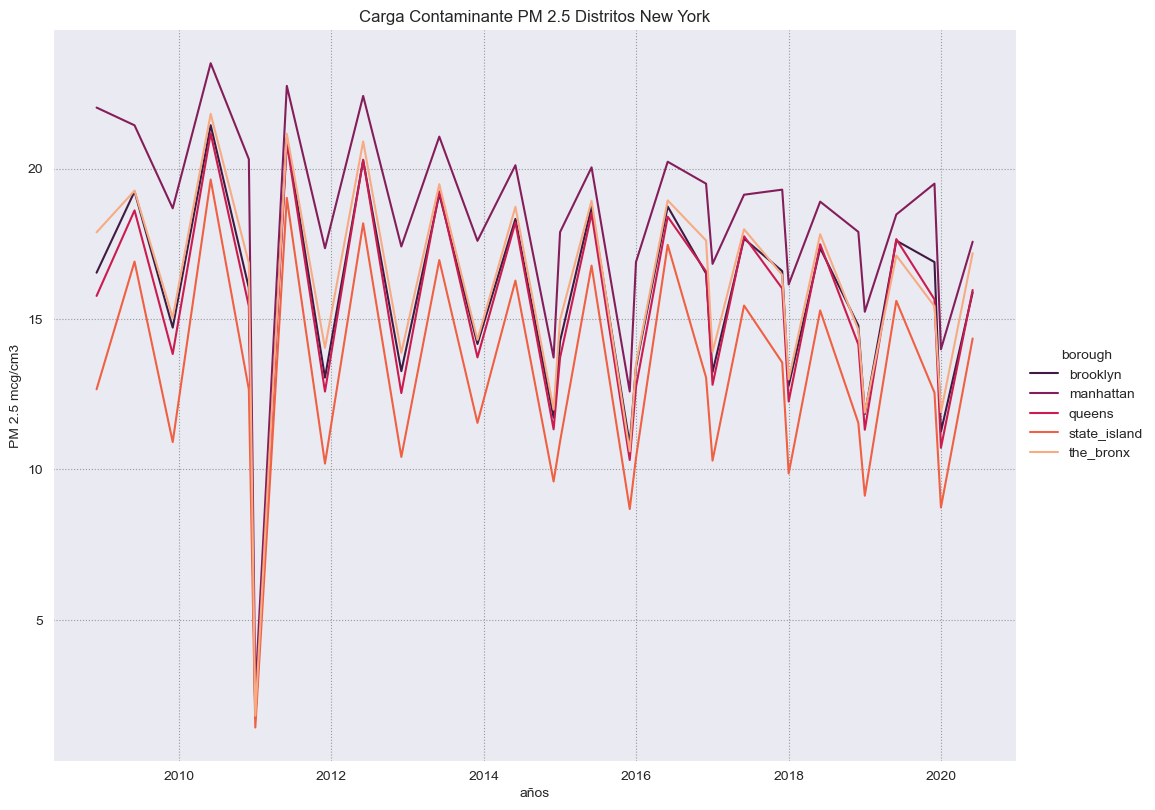

In [166]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"}) # Formato para el Backgound del grafico

sns.relplot(x="date", y="data_value", data=CD_air_pm, kind="line", hue='borough', 
            markers=True, height=8, aspect=1.3,  palette="rocket")

plt.xlabel('años')
plt.ylabel('PM 2.5 mcg/cm3')
plt.title('Carga Contaminante PM 2.5 Distritos New York')

plt.show()

In [14]:
# Se exporta dataset

df_final.to_parquet("df_final.parquet",index=False)     #dataframe 1